# Week 11 - Exercise

## Problem Statement

Water (density 1000 kg m$^{-3}$, viscosity 1 mN s m$^{-2}$) is used to fluidise a bed of packed spheres characterised by a diameter of 0.5 mm and a density of 1500 kg m$^{-3}$.

### Tasks
- Demonstrate that, in laminar regime, the minimum fluidization velocity is always smaller than the terminal falling velocity. 
- Compute the minimum fluidisation velocity and the terminal falling velocity of the bed particles.
- Sketch a plot of the $\Delta{P}$ as a function of the fluid velocity, clearly indicating the minimum fluidisation velocity.
- How would your result change if particles were twice as large?
- What does the terminal falling velocity represent in the context of fluidisation? 

### Solution


#### Task 1

In the laminar regime, for spherical particles of diameter $d$ the minimum fluidization velocity is given by: 

$$
v_{mf}=\frac{1}{180}\frac{e^3}{(1-e)}\frac{d^2(\rho_s-\rho_f)g}{\mu}
$$

where, $e$ is the void fraction, $d$ the diameter of the particles, $\rho_s$ is the density of the particles,  $\rho_f$ is the density of the fluidising fluid, $g$ is the gravity acceleration constant, and $\mu$ the viscosity of the fluid. 

The terminal falling velocity, conversely is determined by the steady state force balance on a single particle: 

$$
v_t^2=Cd^{-1}\frac{(\rho_s-\rho_f)}{\rho_f}\frac{4d}{3}g
$$

where $Cd$ is the drag coefficient. 

If we introduce the definition of the drag coefficient in laminar regime given by the Stokes relation: 

$$
Cd=\frac{24}{Re_p}=\frac{24\mu}{\rho_fdv}
$$

where $Re_p$ is the Reynolds number and $v$ the velocity of the fluid, we get: 

$$
v_t=\frac{\rho_fd}{24\mu}\frac{(\rho_s-\rho_f)}{\rho_f}\frac{4d}{3}g=\frac{1}{18}\frac{d^2(\rho_s-\rho_f)g}{\mu}
$$

Now, if we take the ratio between $v_{mf}$ and $v_t$ we get: 


$$
\frac{v_{mf}}{v_t}=\frac{\frac{1}{180}\frac{e^3}{(1-e)}\frac{d^2(\rho_s-\rho_f)g}{\mu}}{\frac{1}{18}\frac{d^2(\rho_s-\rho_f)g}{\mu}}=\frac{1}{10}\frac{e^3}{(1-e)}
$$

Since the void fraction $0<e<1$ by definition, with a lower theoretical limit at $\approx{0.36}$ (corresponding to a close-packing of equal spheres),  the term $\frac{e^3}{(1-e)}$ is dof order $e^2$ and smaller than 1. 

Hence 
$$
\frac{v_{mf}}{v_t}<1
$$

and the minimum fluidization velocity is always smaller than the terminal Falling velocity, irrespective of $d$, $\rho_p$, $\rho_f$ or $\mu$.


#### Task 2 / 4

In order to solve task 2 we need to estimate the void fraction. A typical approach whne the actual void fraction is not provided is to compute it as the ratio between the volume of a sphere of diameter $d$ and a cube with the side of lenghth $d$. 

$$
e=1-\frac{\pi}{6}
$$



In [51]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

rho_f=1000 #
rho_s=1500 # kg m$^{-3}

mu = 1E-3 # N s m$^{-2}$
d = 0.5 * 1E-3 #m
g=9.81 # m /s^2
e=1-np.pi/6
common=d**2*(rho_s-rho_f)*g/mu #m/s
v_mf=1/180*(e**3/(1-e))*common
v_t=1/18*common

print("\nDiameter: ", f"{d:.4}", " [mm]")
print("\nTerminal Falling velocity: ", f"{v_t:.4}", " [m/s]")
print("Minimum Fluidisation velocity: ", f"{v_mf:.4}", " [m/s]")

common=(2*d)**2*(rho_s-rho_f)*g/mu #m/s
v_mf=1/180*(e**3/(1-e))*common
v_t=1/18*common

print("\nDiameter: ", f"{2*d:.4}", " [mm]")
print("\nTerminal Falling velocity: ", f"{v_t:.4}", " [m/s]")
print("Minimum Fluidisation velocity: ", f"{v_mf:.4}", " [m/s]\n")



Diameter:  0.0005  [mm]

Terminal Falling velocity:  0.06813  [m/s]
Minimum Fluidisation velocity:  0.001407  [m/s]

Diameter:  0.001  [mm]

Terminal Falling velocity:  0.2725  [m/s]
Minimum Fluidisation velocity:  0.005627  [m/s]



#### Task 3 / 4

Without specifying the total lenght of the packed bed it is only possible to plot the pressure gradient $\Delta{P}/l$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

# Data
N=1000

v=np.linspace(0,v_mf, N)
color=iter(cm.gist_heat(np.linspace(0,1,3)))


#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mDeltaP_l_mf=v_mf*180*(1-e)**2/e**3*mu/d**2 # N/m
mDeltaP_l=v*180*(1-e)**2/e**3*mu/d**2 # N/m
c=next(color)
axes.plot(v,mDeltaP_l, marker=' ',c=c) 
axes.plot(v_mf,mDeltaP_l_mf,marker='o',markersize=10,c=c)


# Double particle diameter
c=next(color)
mDeltaP_l_mf=v_mf*180*(1-e)**2/e**3*mu/(2*d)**2 # N/m
mDeltaP_l=v*180*(1-e)**2/e**3*mu/(2*d)**2 # N/m
axes.plot(v,mDeltaP_l, marker=' ',c=c) 
axes.plot(v_mf,mDeltaP_l_mf,marker='o',markersize=10,c=c)
axes.set_xlabel('$v$ [$m s^{-1}$]', fontsize=18);
axes.set_ylabel('$-\Delta{P}$ ${l^{-1}}$ [N/m$^3$]',fontsize=18);
axes.set_xlim([0,1]);
axes.set_ylim([0,1]);



NameError: name 'v_mf' is not defined

We can treat the bed length as a parameter, to show the behaviour of the $\Delta{P}$ as a function of velocity: 

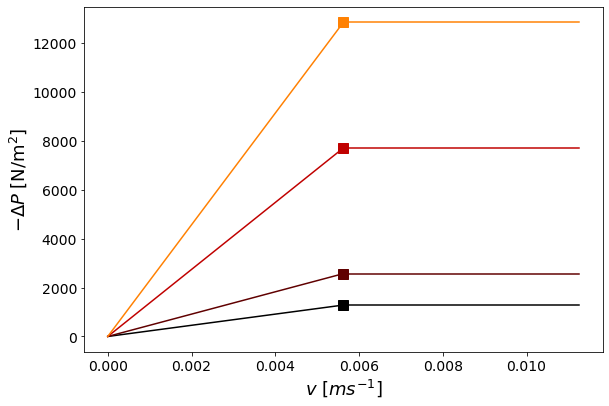

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm


# Data
N=1000
#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Parameter: bed length
lengths=np.array([0.5, 1, 3, 5])

color=iter(cm.gist_heat(np.linspace(0,1,np.size(lengths)+1)))

for l in lengths: 
    c=next(color)
    mDeltaP_mf=mDeltaP_l_mf*l # N/m
    mDeltaP=mDeltaP_l*l # N/m
    axes.plot(v,mDeltaP, marker=' ',c=c) 
    axes.plot(np.array([v_mf, 2*v_mf]),mDeltaP_mf*np.array([1,1]), marker=' ',c=c) 
    axes.plot(v_mf,mDeltaP_mf,marker='s',markersize=10,c=c)

axes.set_xlabel('$v$ [$m s^{-1}$]', fontsize=18);
axes.set_ylabel('$-\Delta{P}$ [N/m$^2$]',fontsize=18);

#### Task 5 

The terminal falling velocity corresponds to the velocity at whixh thew drag froces counterbalance the net weight of the particles, over coming thisb velocity leads to net upward acceleration of the particles and corresponds to the instauration of the transport regime. 